<a href="https://colab.research.google.com/github/Datalyticallab/DataHW/blob/main/%D0%94%D0%97_4_5_%22hw_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Модуль 4 Візуалізації/yulu_rental.csv')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

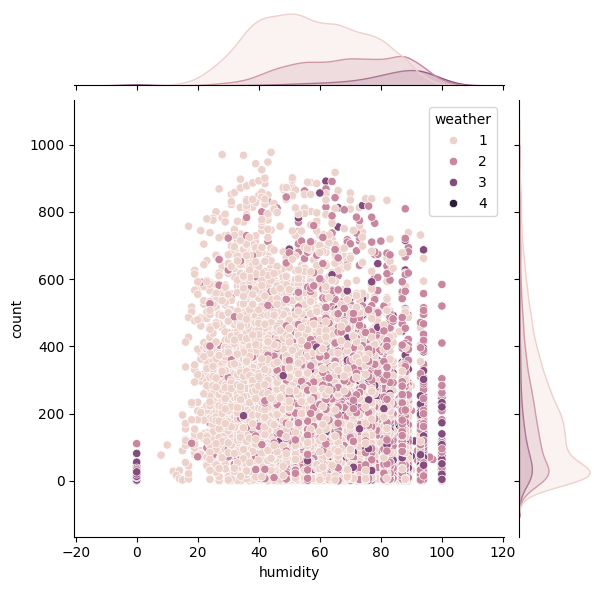

In [5]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather' );

Є певна група даних, які не вписуються в загальну картину: при вологості 0 % та 100%, а також трохи окремо розташувалися дані при вологості близько 90%. При вологості від 20 до 80 не спостерігається сильної залежності між вологістю та кількістю орендованих велосипедів, лише трохи більше їх орендували при вологості в районі від 20 до 50, ніж від 50 до 80. При такій вологості маємо переважно гарні погодні умови.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [6]:
df_springsummer = df[(df.season == 1) | (df.season == 2)]


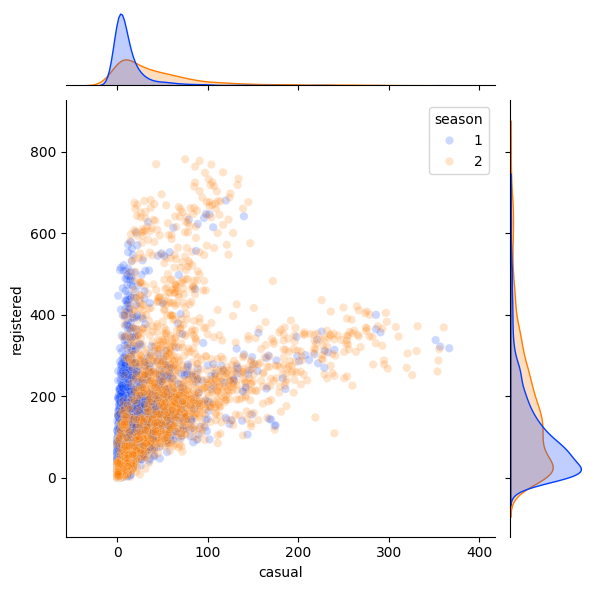

In [7]:
sns.jointplot(data = df_springsummer, x = 'casual', y = 'registered', hue = 'season', alpha=.2, palette = 'bright');

Електровелосипеди орендують більше зареєстровані користувачі, ніж звичайні. Весною співвідношення зареєстрованих користувачів до незараєстрованих значно більше, ніж влітку. Можна припустити, що влітку з'являються користувачі, які користуються сервісом час від часу і тому не реєструються або ті, хто зкористалися сервісом як виключення, можливо, туристи.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


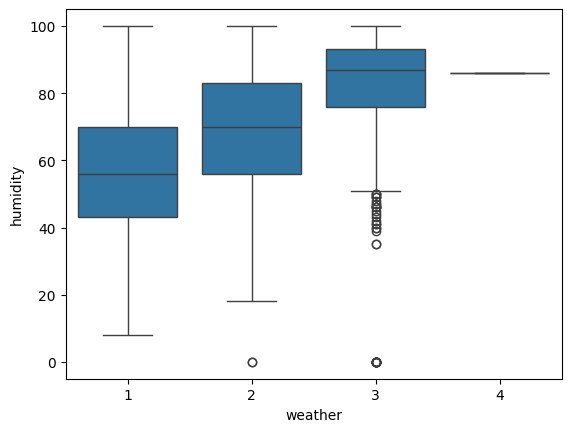

In [8]:
sns.boxplot(data = df, x = 'weather', y = 'humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [9]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [10]:
df.holiday.unique()

array([0, 1])

In [11]:
df.workingday.unique()

array([0, 1])

In [32]:
def daytype(row):
  if row['holiday'] == 1:
     return 'holiday'
  elif row['workingday'] == 1:
    return 'working_day'
  else:
    return 'weekend'

In [33]:
df['holiday_workingday'] = df.apply(daytype, axis=1)

In [34]:
df_filtered = df[[ 'casual','registered', 'count', 'holiday_workingday' ]]
df_filtered.head(3)

,casual,registered,count,holiday_workingday
0,3,13,16,weekend
1,8,32,40,weekend
2,5,27,32,weekend


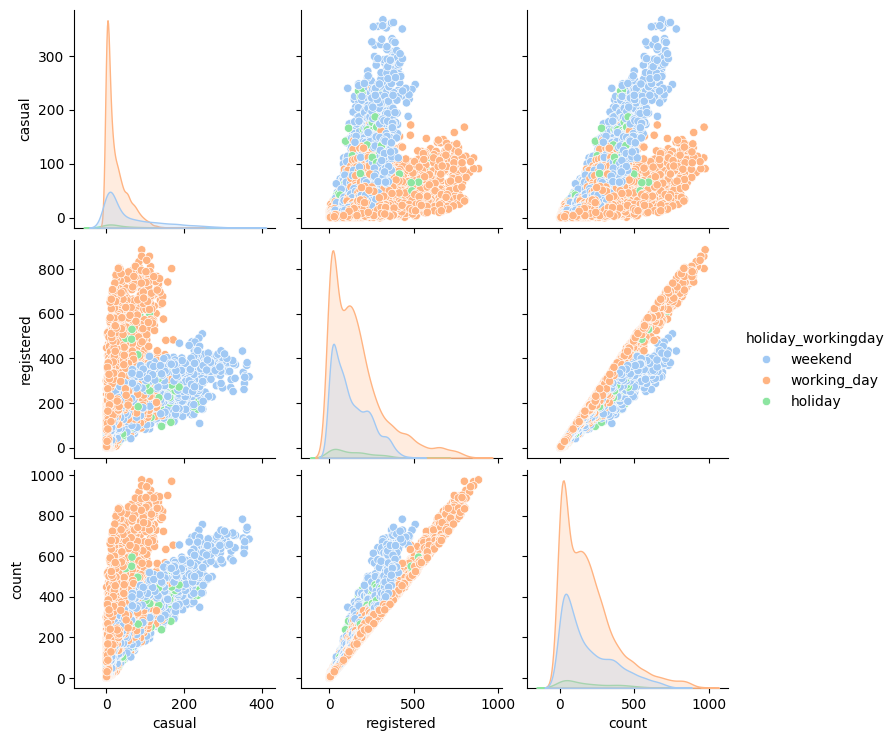

In [36]:
sns.pairplot(df_filtered, hue = 'holiday_workingday', palette='pastel')
plt.show();

**У святкові дні дуже низькі показники оренди електровелосипедів. можна сказати, що у святкові дні їх майже не орендують. При цьому кількість  незареєстрованих користувачів зазвичай  вища, ніж зареєстрованих. **

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [16]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [37]:
df['date'] = df.datetime.dt.date


In [38]:
df_viz = df[['date', 'registered', 'casual']]


In [29]:
df_vizgrpouped = df_viz.groupby('date').sum().reset_index()
df_vizgrpouped.head(3)

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120


<Figure size 3200x1600 with 0 Axes>

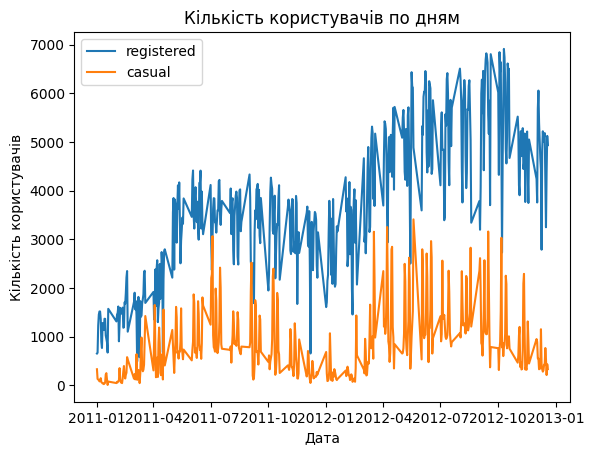

In [31]:
plt.figure(figsize=(20,10), dpi=160)
df_vizgrpouped.plot('date', y=['registered', 'casual'])
plt.title('Кількість користувачів по дням')
plt.xlabel('Дата')
plt.ylabel('Кількість користувачів')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
